In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
data = pd.read_csv(r"C:\Users\hp\Downloads\employee_data.csv")
data.head()

,EmployeeID,Name,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition
0,1,John Doe,29,Sales,55000,3,80,No
1,2,Jane Smith,35,HR,60000,7,85,No
2,3,Michael Brown,40,Engineering,80000,10,95,Yes
3,4,Emily Davis,28,Marketing,65000,5,78,No
4,5,David Johnson,50,Sales,75000,20,88,Yes


In [23]:
data.shape

(100, 8)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   EmployeeID        100 non-null    int64 
 1   Name              100 non-null    object
 2   Age               100 non-null    int64 
 3   Department        100 non-null    object
 4   Salary            100 non-null    int64 
 5   YearsAtCompany    100 non-null    int64 
 6   PerformanceScore  100 non-null    int64 
 7   Attrition         100 non-null    object
dtypes: int64(5), object(3)
memory usage: 6.4+ KB


In [27]:
data.isnull().sum()

EmployeeID          0
Name                0
Age                 0
Department          0
Salary              0
YearsAtCompany      0
PerformanceScore    0
Attrition           0
dtype: int64

In [29]:
data.duplicated(subset=['Name']).sum()

2

In [31]:
data = data.drop_duplicates()

In [33]:
data.shape

(100, 8)

In [35]:
# Clean: Trim spaces and standardize text case in 'Department' and 'Attrition'
data['Department'] = data['Department'].str.strip().str.title()
data['Attrition'] = data['Attrition'].str.strip().str.capitalize()

In [39]:
# Final check of unique values
data['Department'].unique()
data['Attrition'].unique()

array(['No', 'Yes'], dtype=object)

In [41]:
data.to_csv("cleaned_employee_data.csv", index=False)

In [43]:
data.head()

,EmployeeID,Name,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition
0,1,John Doe,29,Sales,55000,3,80,No
1,2,Jane Smith,35,Hr,60000,7,85,No
2,3,Michael Brown,40,Engineering,80000,10,95,Yes
3,4,Emily Davis,28,Marketing,65000,5,78,No
4,5,David Johnson,50,Sales,75000,20,88,Yes


In [45]:
data.describe()

,EmployeeID,Age,Salary,YearsAtCompany,PerformanceScore
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,36.570000,72820.000000,10.800000,84.940000
std,29.011492,8.318478,12643.823102,6.361183,6.349771
min,1.000000,25.000000,43000.000000,1.000000,70.000000
25%,25.750000,29.750000,65000.000000,5.000000,80.000000
50%,50.500000,35.000000,72000.000000,10.000000,85.500000
75%,75.250000,41.250000,82750.000000,16.000000,90.000000
max,100.000000,60.000000,95000.000000,25.000000,95.000000


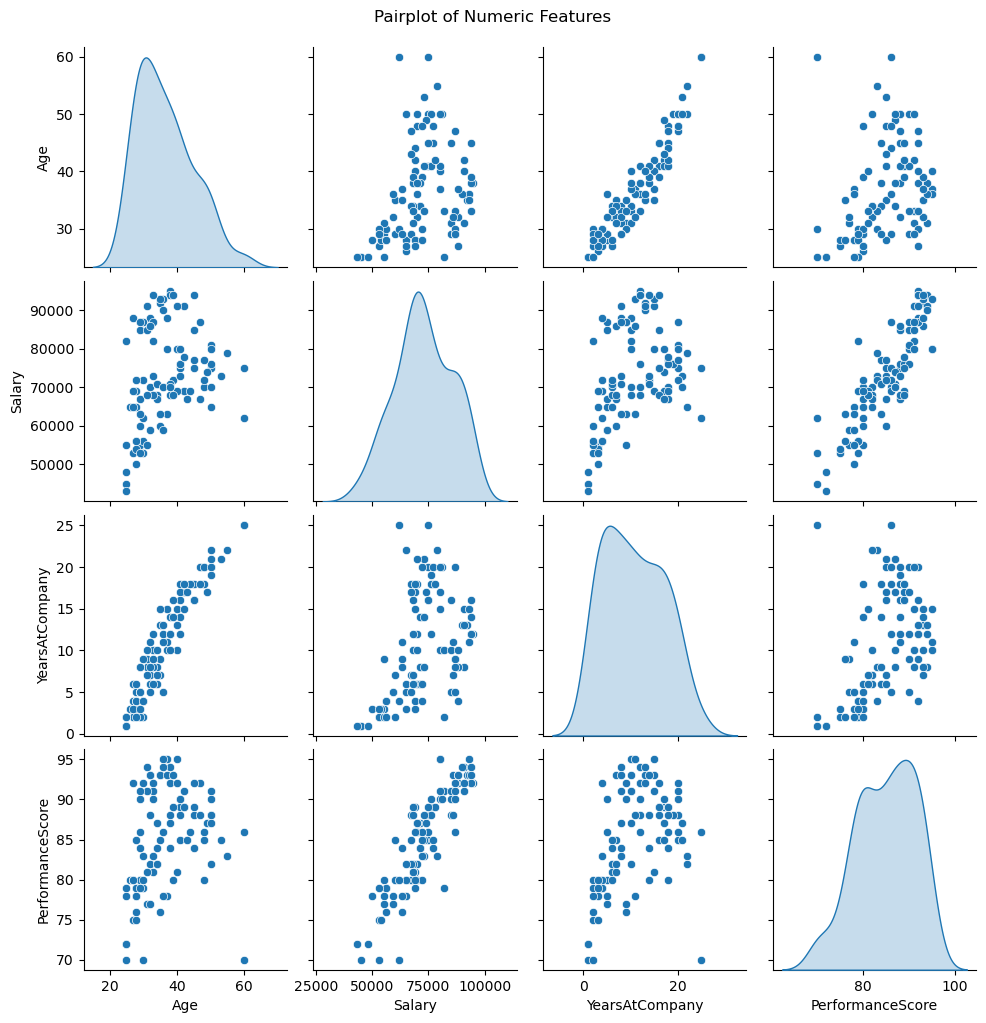

In [59]:
sns.pairplot(data[['Age','Salary','YearsAtCompany','PerformanceScore']], diag_kind='kde')
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()

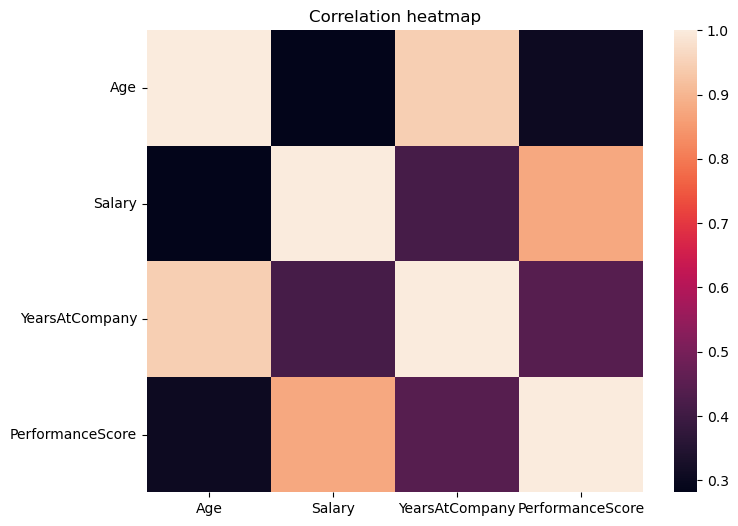

In [61]:
plt.figure(figsize=(8,6))
sns.heatmap(data[['Age', 'Salary', 'YearsAtCompany', 'PerformanceScore']].corr())
plt.title("Correlation heatmap")
plt.show()

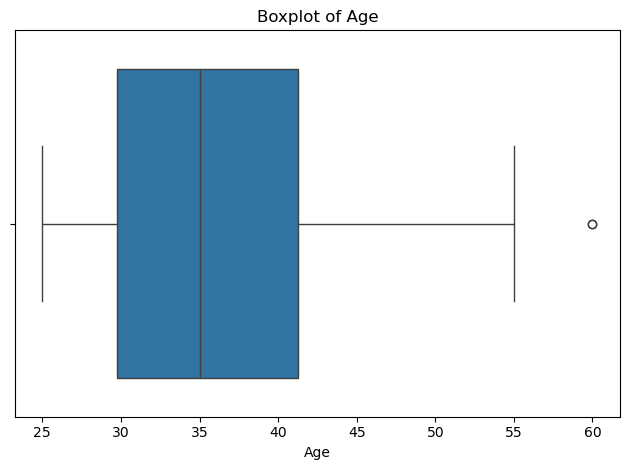

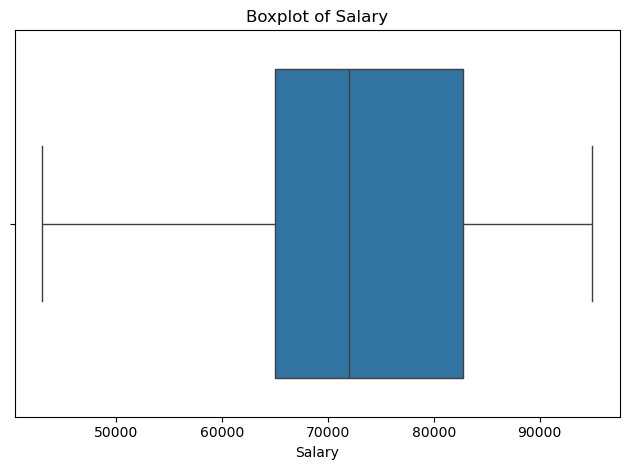

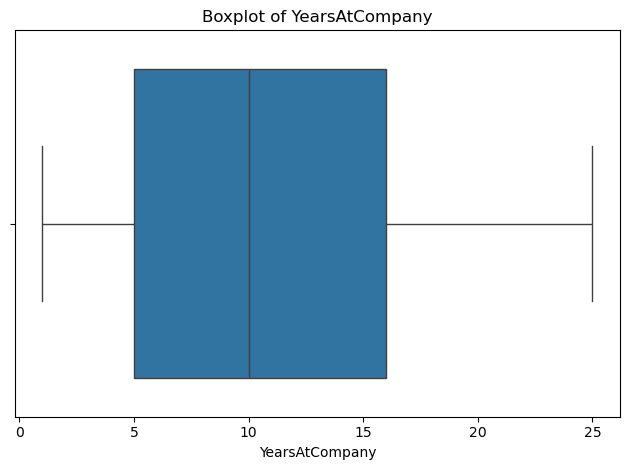

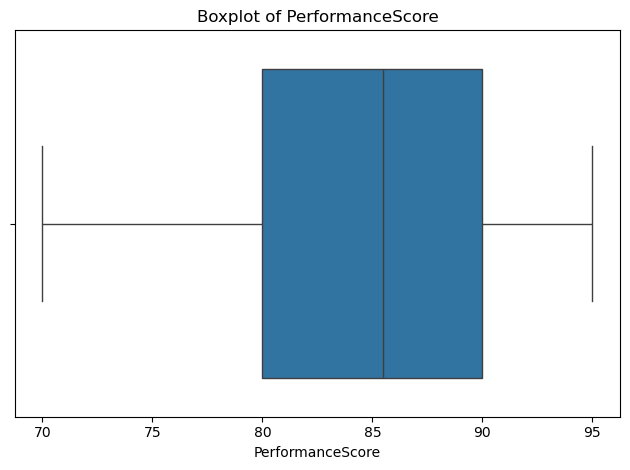

In [67]:
cols= ['Age','Salary','YearsAtCompany','PerformanceScore']

for col in cols:
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()

In [73]:
from scipy import stats

In [75]:
attrition_probs = data.groupby('Department')['Attrition'].value_counts(normalize=True).unstack()
print(attrition_probs)

Attrition          No       Yes
Department                     
Engineering  0.571429  0.428571
Hr           0.653846  0.346154
Marketing    0.800000  0.200000
Sales        0.461538  0.538462


In [83]:
high_perf = data['PerformanceScore'] > 85

# P(Attrition = Yes)
p_attrition = (data['Attrition'] == 'Yes').mean()

# P(High Performance)
p_high_perf = high_perf.mean()

# P(High Performance | Attrition)
p_high_perf_given_attrition = ((data['Attrition'] == 'Yes') & high_perf).sum() / (data['Attrition'] == 'Yes').sum()

# Apply Bayes' Theorem
p_attrition_given_high_perf = (p_high_perf_given_attrition * p_attrition) / p_high_perf

print(f"\nP(Attrition | Performance > 85): {p_attrition_given_high_perf:.4f}")


P(Attrition | Performance > 85): 0.4600


In [85]:
#hpyothesis testing

grouped_perf = [group['PerformanceScore'].values for name, group in data.groupby('Department')]
f_stat, p_value = stats.f_oneway(*grouped_perf)

print("\n Hypothesis Testing (One-Way ANOVA on Performance by Department):")
print(f"F-Statistic: {f_stat:.3f}")
print(f"P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("Result: Reject Null Hypothesis – Significant difference in performance across departments.")
else:
    print("Result: Fail to Reject Null – No significant difference in department-wise performance.")


 Hypothesis Testing (One-Way ANOVA on Performance by Department):
F-Statistic: 25.781
P-Value: 0.0000
Result: Reject Null Hypothesis – Significant difference in performance across departments.


In [93]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [101]:
df_encoded = data.copy()

le_attr = LabelEncoder()
df_encoded['Attrition'] = le_attr.fit_transform(df_encoded['Attrition'])  # No=0, Yes=1

df_encoded = pd.get_dummies(df_encoded, columns=['Department'], drop_first=True)

scaler = StandardScaler()
scaled_cols = ['Salary', 'PerformanceScore', 'Age', 'YearsAtCompany']
df_encoded[scaled_cols] = scaler.fit_transform(df_encoded[scaled_cols])

X = df_encoded.drop(columns=['EmployeeID', 'Name', 'Attrition'])  # Features
y = df_encoded['Attrition']  # Target variable

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Feature Engineering Completed")
print("X_train shape:", X_train.shape)
print("y_train distribution:\n", y_train.value_counts())


✅ Feature Engineering Completed
X_train shape: (80, 7)
y_train distribution:
 Attrition
0    48
1    32
Name: count, dtype: int64


Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.69      0.67        13
           1       0.33      0.29      0.31         7

    accuracy                           0.55        20
   macro avg       0.49      0.49      0.49        20
weighted avg       0.53      0.55      0.54        20



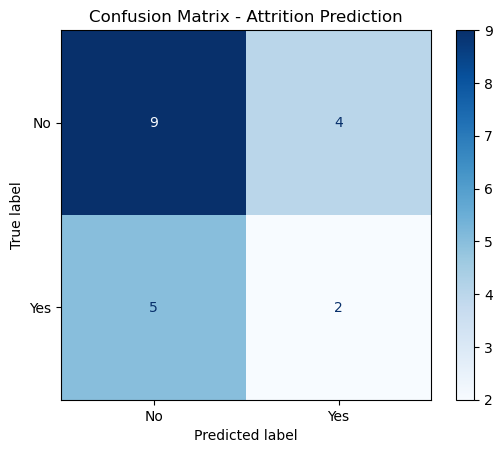

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Initialize and train model
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le_attr.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Attrition Prediction")
plt.show()

R² Score: 0.7285323695184431
Mean Squared Error: 0.34725419157008874


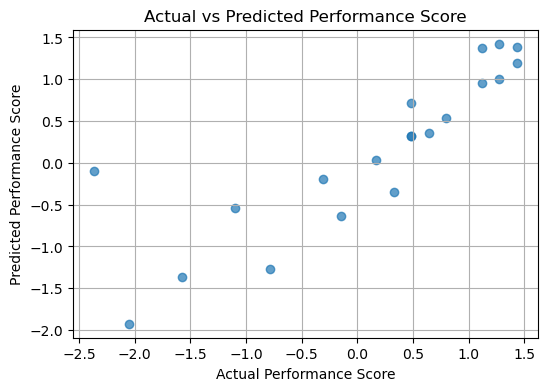

In [109]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Target: PerformanceScore
y_perf = df_encoded['PerformanceScore']
X_perf = df_encoded.drop(columns=['EmployeeID', 'Name', 'PerformanceScore'])

# Train-test split
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_perf, y_perf, test_size=0.2, random_state=42)

# Model training
lr = LinearRegression()
lr.fit(X_train_p, y_train_p)

# Prediction
y_pred_p = lr.predict(X_test_p)

# Evaluation
print("R² Score:", r2_score(y_test_p, y_pred_p))
print("Mean Squared Error:", mean_squared_error(y_test_p, y_pred_p))

# Visualization
plt.figure(figsize=(6, 4))
plt.scatter(y_test_p, y_pred_p, alpha=0.7)
plt.xlabel("Actual Performance Score")
plt.ylabel("Predicted Performance Score")
plt.title("Actual vs Predicted Performance Score")
plt.grid(True)
plt.show()

🔹 R² Score: 0.7822111241676459
🔹 Mean Squared Error: 0.2785897525828983


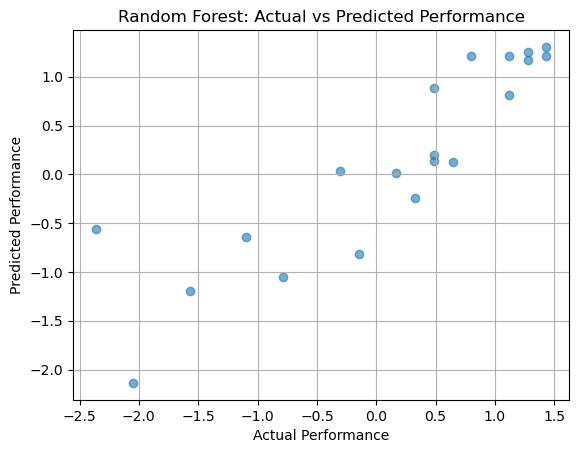

In [121]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train_p, y_train_p)

# Predict
y_pred_rf = rf_reg.predict(X_test_p)

# Evaluation
print("🔹 R² Score:", r2_score(y_test_p, y_pred_rf))
print("🔹 Mean Squared Error:", mean_squared_error(y_test_p, y_pred_rf))

# Visualization
plt.scatter(y_test_p, y_pred_rf, alpha=0.6)
plt.xlabel("Actual Performance")
plt.ylabel("Predicted Performance")
plt.title("Random Forest: Actual vs Predicted Performance")
plt.grid(True)
plt.show()

🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.69      0.69        13
           1       0.43      0.43      0.43         7

    accuracy                           0.60        20
   macro avg       0.56      0.56      0.56        20
weighted avg       0.60      0.60      0.60        20



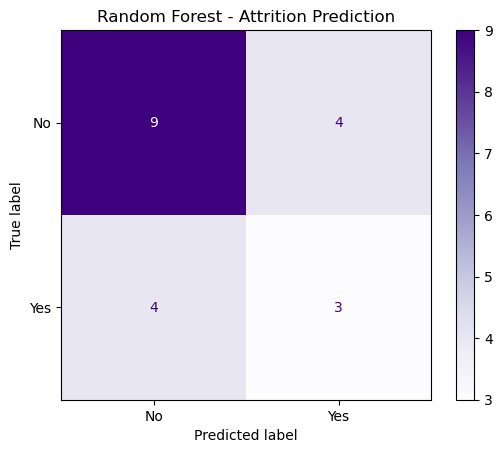

In [123]:
from sklearn.ensemble import RandomForestClassifier

# Train the model
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Predict
y_pred_rf_attr = rf_clf.predict(X_test)

# Evaluation
print("🔹 Classification Report:")
print(classification_report(y_test, y_pred_rf_attr))

# Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf_attr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=le_attr.classes_)
disp.plot(cmap='Purples')
plt.title("Random Forest - Attrition Prediction")
plt.show()

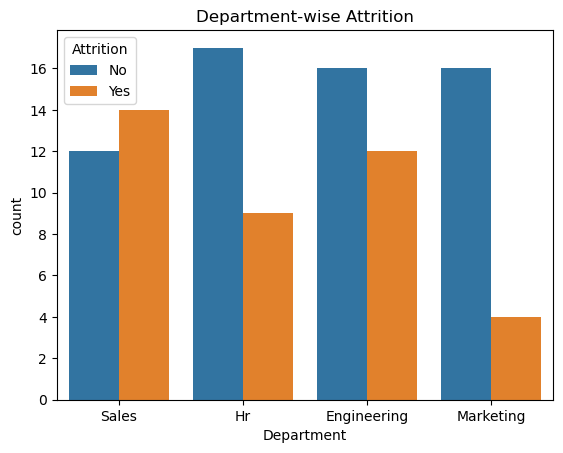

In [127]:
sns.countplot(x='Department', hue='Attrition', data=data)
plt.title("Department-wise Attrition")
plt.show()

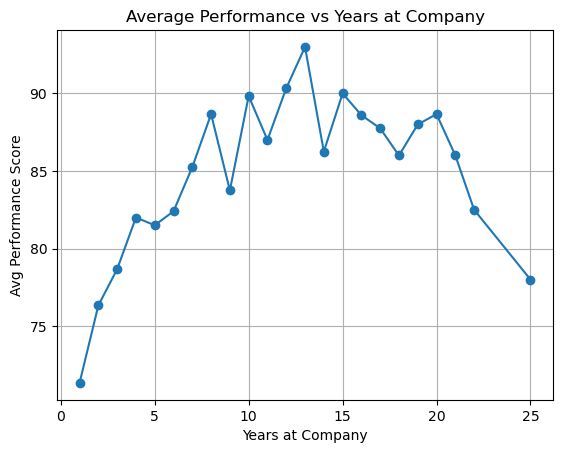

In [129]:
avg_perf = data.groupby('YearsAtCompany')['PerformanceScore'].mean()
avg_perf.plot(kind='line', marker='o')
plt.title("Average Performance vs Years at Company")
plt.xlabel("Years at Company")
plt.ylabel("Avg Performance Score")
plt.grid(True)
plt.show()

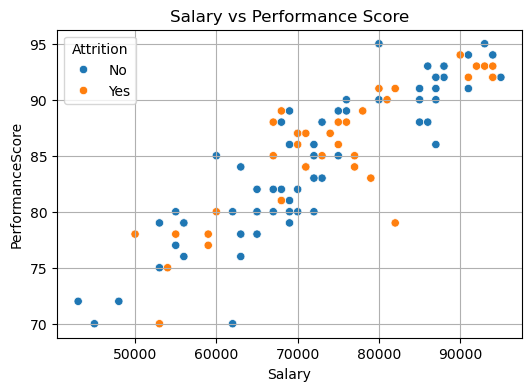

In [131]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=data, x='Salary', y='PerformanceScore', hue='Attrition')
plt.title("Salary vs Performance Score")
plt.grid(True)
plt.show()